# Predict the percentage of marks of an student based on the number of study hours

In [ ]:
# import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url='http://bit.ly/w-data'
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

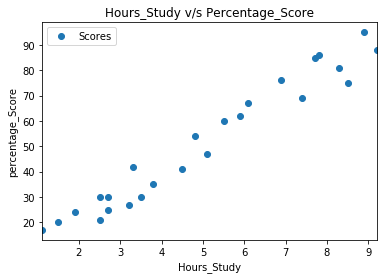

In [11]:
s_data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours_Study v/s Percentage_Score')
plt.xlabel('Hours_Study')
plt.ylabel('percentage_Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now will train our algorithm. 

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
Regressor1 = LinearRegression()
Regressor1.fit(X,y)
print( "Training_model")

Training_model


In [25]:
# Plotting the regression line
line = Regressor1.coef_*X+Regressor1.intercept_


In [26]:
# PLOTTING FOR TEST

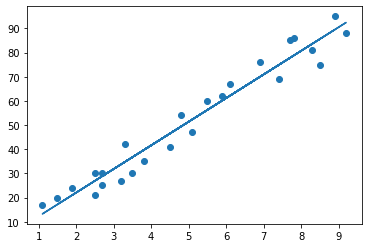

In [29]:
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

# Predictions

In [31]:
print(X_test) # Testing Data
y_pred = Regressor1.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
# comparing ACtual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [43]:
print("Training Score ", Regressor1.score(X_train,y_train))
print("Testing Score", Regressor1.score (X_test,y_test))

Training Score  0.9512837351709387
Testing Score 0.9491748734859172


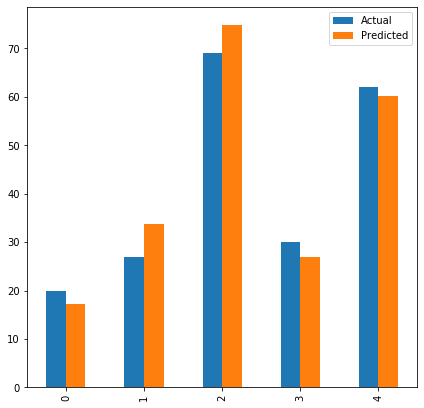

In [48]:
# #plotting the bar char to depict the actual and predicted value
df.plot(kind = 'bar', figsize = (7,7))
plt.show()

In [49]:
#prediction for 9.25 hr 
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = Regressor1.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.9098547701573


# Evaluating Model 

In [42]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.071877793635605
Mean Squared Error:  20.138948129940175
Root Mean Squared Error:  4.487643939746131
Explained Variance Score:  0.9515224335188082


Above final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 